In [1]:
#Pacotes necessários

import getdist
from getdist import mcsamples, plots
import matplotlib.pyplot as plt
import os
os.chdir(r"C:\Users\Paula\Projeto LateDE\Fig11_DESI_DR2\Resultados MCMC")  #Indica o diretório onde estão os arquivos .txt que serão necessários



In [2]:
#Carrega e nomeia as cadeias MCMC para facilitar quando for chamar os dados

chain1 = mcsamples.loadMCSamples("chains/MCMC1")
chain2 = mcsamples.loadMCSamples("chains/MCMC2")
chain3 = mcsamples.loadMCSamples("chains/MCMC3")
chain4 = mcsamples.loadMCSamples("chains/MCMC4")

for ch in [chain1, chain2, chain3, chain4]:
    ch.removeBurn(0.3)   #Remove 30% das amostras iniciais (burn-in), sugestão de boas práticas para análise de cadeias MCMC
    ch.addDerived(ch["w0pwa"] - ch["w"], name="wa", label="w_a")   #Define o parâmetro derivado w_a = (w0 + w_a) - w. Aqui w = w0


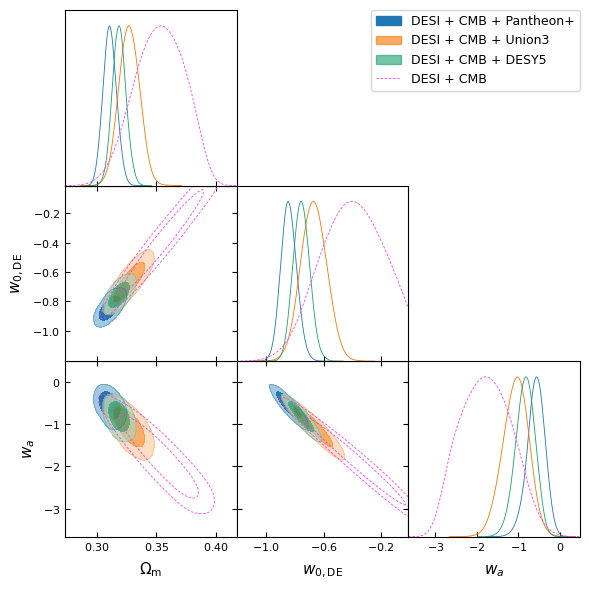

In [3]:
#Gráfico tipo Corner Plot

g = plots.get_subplot_plotter()
g.settings.alpha_filled_add = 0.6

g.triangle_plot(
    [chain1, chain2, chain3, chain4],
    ["omegam", "w", "wa"],
    filled=True,
  legend_labels=[
        "DESI + CMB + Pantheon+",
        "DESI + CMB + Union3",
        "DESI + CMB + DESY5",
        "DESI + CMB"
    ],
     line_args=[{"color": "#1f77b4"}, {"color": "#fa7602"}, {"color": "#18a16d"}, {"ls": "--","color": "#f540ec"}],
    contour_args=[{"color": "#1f77b4"}, {"color": "#fa7602"}, {"color": "#18a16d"}, {"filled":False, "ls": "--","color": "#f540ec"}],
) 


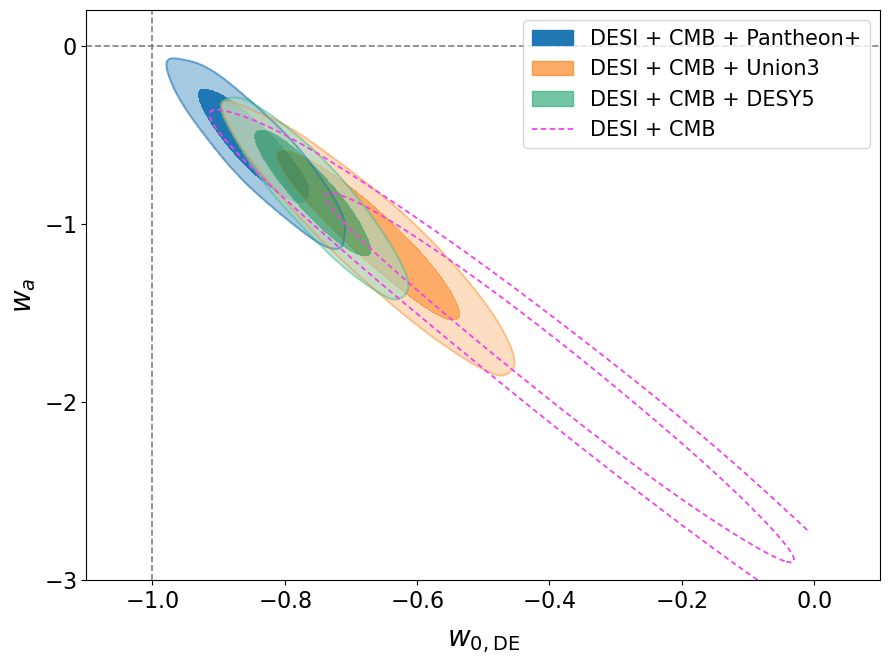

In [4]:
#Gráfico 2D w0 x wa


g = plots.get_single_plotter(width_inch=9)

g.settings.alpha_filled_add = 0.6
g.settings.num_plot_contours = 2
g.settings.linewidth = 0.5

g.settings.lab_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.legend_fontsize = 15


g.plot_2d(
    [chain1, chain2, chain3],
    "w", "wa",
    filled=True, #Contorno preenchido com cor
    colors=["#1f77b4", "#fa7602", "#18a16d"],
    legend_labels=[
        "DESI + CMB + Pantheon+",
        "DESI + CMB + Union3",
        "DESI + CMB + DESY5"
        ],
    lims=[-1.1, 0.1, -3.0, 0.2]
)

g.plot_2d(
    chain4,
    "w", "wa",
    filled=False, #Contorno vazio de cor
     ls='--',
    colors=["#f540ec"],
       legend_labels=["DESI + CMB"], 
    lims=[-1.1, 0.1, -3.0, 0.2]      
)


# ΛCDM
g.add_x_marker(-1.0, color='gray', ls='--', lw=1.2)
g.add_y_marker(0.0,  color='gray', ls='--', lw=1.2)

g.add_legend(
    [   "DESI + CMB + Pantheon+",
        "DESI + CMB + Union3",
        "DESI + CMB + DESY5",
        "DESI + CMB"],
    legend_loc="upper right"
)

g.export("fig11_reproducao.pdf")


In [5]:
#Calcula e imprime os valores de Ω_m com incertezas: Parte 1

def omega_m_stats(chain):
    stats = chain.getParams()
    samples = stats.omegam   
    mean = samples.mean()
    std  = samples.std()
    return mean, std


In [6]:
#Calcula e imprime os valores de Ω_m com incertezas: Parte 2

results = {
    "DESI + CMB + Pantheon+": omega_m_stats(chain1),
    "DESI + CMB + Union3":    omega_m_stats(chain2),
    "DESI + CMB + DESY5":     omega_m_stats(chain3),
    "DESI + CMB":             omega_m_stats(chain4),
}

for key, (mean, std) in results.items():
    print(f"{key}: Ωm = {mean:.4f} ± {std:.4f}")


DESI + CMB + Pantheon+: Ωm = 0.3107 ± 0.0057
DESI + CMB + Union3: Ωm = 0.3271 ± 0.0088
DESI + CMB + DESY5: Ωm = 0.3186 ± 0.0058
DESI + CMB: Ωm = 0.3528 ± 0.0209


In [ ]:
#Calcula e imprime os valores de H0, w0 e wa com incertezas: Parte 1
# Calcula a média e erro assimétrico, quando existente, e entrega o resultado em formato LaTeX

def mean_sigma(chain, parname):
    samples = getattr(chain.getParams(), parname)
    return samples.mean(), samples.std(), chain.getInlineLatex(parname, limit=1)


In [ ]:
#Calcula e imprime os valores de H0, w0 e wa com incertezas: Parte 2
# Calcula a média e erro assimétrico, quando existente, e entrega o resultado em formato LaTeX

params = ['H0', 'w', 'wa']

for name, chain in [
    ("DESI + CMB + Pantheon+", chain1),
    ("DESI + CMB + Union3", chain2),
    ("DESI + CMB + DESY5", chain3),
    ("DESI + CMB", chain4),
]:
    print(f"\n{name}")
    for p in params:
        mean, std, latex = mean_sigma(chain, p)
        #print(f"{p} = {mean:.3f} ± {std:.3f}")
        print(latex) 



DESI + CMB + Pantheon+
H_0 = 67.63\pm 0.59
w_{0,\mathrm{DE}} = -0.843\pm 0.055
w_a = -0.58^{+0.23}_{-0.19}

DESI + CMB + Union3
H_0 = 66.03\pm 0.84
w_{0,\mathrm{DE}} = -0.669\pm 0.090
w_a = -1.07^{+0.33}_{-0.29}

DESI + CMB + DESY5
H_0 = 66.86\pm 0.57
w_{0,\mathrm{DE}} = -0.755\pm 0.058
w_a = -0.84^{+0.25}_{-0.22}

DESI + CMB
H_0 = 63.7^{+1.6}_{-2.1}
w_{0,\mathrm{DE}} = -0.41^{+0.24}_{-0.20}
w_a = -1.78\pm 0.61
